#### K-Means

Algorithm:

- initialize $k$ cluster centroids
- repeat until convergence:
    - for each point, compute which centroid is nearest to it
    - for each centroid, update its location to the mean location of the points assigned to it

In [1]:
# imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

Define dataset

In [17]:
np.array([1, 0])

array([1, 0])

In [18]:
# add offsets to define different cluster centers
0.75 + np.array([1, 0])

array([ 1.75,  0.75])

In [19]:
# Return a sample (or samples) from the “standard normal” distribution.
np.random.randn(5, 2)

array([[ 0.93483799,  0.82265671],
       [-0.54548295,  0.15514885],
       [-1.79821542, -0.07200003],
       [ 0.00406381, -0.6604248 ],
       [-0.63029618, -0.24284774]])

In [20]:
np.random.randn(150, 2)

array([[ 0.80193912,  0.4358831 ],
       [ 1.04625937,  0.35239426],
       [-0.47950923, -0.29161952],
       [ 0.42876806,  0.4858584 ],
       [ 0.89148965, -0.66690182],
       [ 0.1277986 ,  1.19323882],
       [ 0.40296819, -2.40372311],
       [-2.12313467, -0.30181174],
       [-0.54507747,  1.82948551],
       [-1.37416666, -1.68055002],
       [ 1.12727538, -1.60118549],
       [ 0.95261052, -0.06414177],
       [ 0.59248527,  2.05767164],
       [-2.63413573, -0.56305828],
       [-1.4017044 ,  1.61443018],
       [-0.97696951, -0.05925401],
       [ 0.30464051,  1.62397857],
       [-2.53738698,  0.86646657],
       [-1.71516349,  0.76674517],
       [ 0.54931763, -1.56597604],
       [ 2.15339988,  0.13773383],
       [ 2.56371794, -0.84548521],
       [-1.40872428, -1.63780826],
       [-0.05493478, -0.15271716],
       [ 0.66772597,  1.59640217],
       [-0.81479506, -0.47296144],
       [-1.23924854,  0.57433706],
       [-0.28153775,  0.7770093 ],
       [ 1.82469944,

In [21]:
# Take a sequence of arrays and stack them vertically to make a single array.
a = np.array([1, 2, 3])
b = np.array([2, 3, 4])
np.vstack((a,b))

array([[1, 2, 3],
       [2, 3, 4]])

In [22]:
points = np.vstack(((np.random.randn(150, 2) * 0.75 + np.array([1, 0])),
                  (np.random.randn(50, 2) * 0.25 + np.array([-0.5, 0.5])),
                  (np.random.randn(50, 2) * 0.5 + np.array([-0.5, -0.5]))))

print(points)

[[ 0.07233804 -1.07836887]
 [ 2.12303462 -0.39017819]
 [ 0.21315688  0.09607684]
 [ 1.9818328  -0.17231723]
 [ 1.60134477  1.05160072]
 [ 0.93650668  1.29852719]
 [ 1.29534281  0.36176307]
 [ 1.93686695 -0.84906761]
 [ 0.31154194 -0.42258189]
 [ 0.01786687  0.21018828]
 [ 0.90430724 -1.28379743]
 [ 0.46376298 -0.09871464]
 [-0.03142471  0.15047988]
 [ 1.13656311 -0.94896695]
 [ 1.24054411 -0.46601968]
 [ 0.45564495 -0.40086721]
 [ 2.28590186 -0.21007038]
 [ 1.08777901  0.89524253]
 [ 0.81066919  0.12304585]
 [ 0.71923973 -0.02859158]
 [ 1.67691702 -0.31039821]
 [-0.29073472 -0.2226495 ]
 [ 0.33319047  0.67141912]
 [ 1.7719823   0.9705726 ]
 [-0.47166469 -1.53251115]
 [ 0.53080268  0.70265467]
 [ 2.94354021 -0.39821146]
 [ 0.50214367  0.04182294]
 [ 1.98480239 -0.62073031]
 [ 0.77103243  0.90697961]
 [ 1.20831719  0.23382715]
 [ 2.13600272  0.14926619]
 [ 1.6897861  -0.88572827]
 [ 0.92894403  1.07312595]
 [ 1.73742276  0.80942704]
 [ 0.66435417  0.36125943]
 [ 0.45163243 -0.85425411]
 

Plot the dataset as well as the cluster centers:

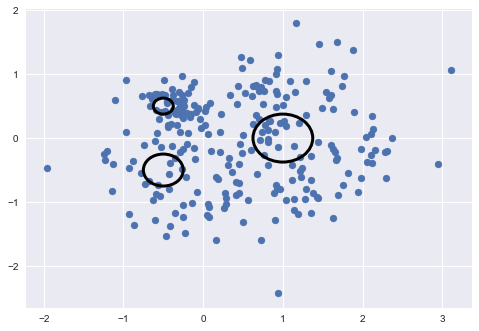

In [23]:
plt.scatter(points[:, 0], points[:, 1])
ax = plt.gca()
ax.add_artist(plt.Circle(np.array([1, 0]), 0.75/2, fill=False, lw=3))
ax.add_artist(plt.Circle(np.array([-0.5, 0.5]), 0.25/2, fill=False, lw=3))
ax.add_artist(plt.Circle(np.array([-0.5, -0.5]), 0.5/2, fill=False, lw=3))

Initialize *k* centroids by randomly selecting them from the data points.

In [25]:
def initialize_centroids(points, k):
    """returns k centroids from the initial points"""
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

In [26]:
initialize_centroids(points, 3)

array([[ 2.28590186, -0.21007038],
       [-0.1929219 ,  0.08479753],
       [-0.08212175, -0.84634596]])

Plot the results

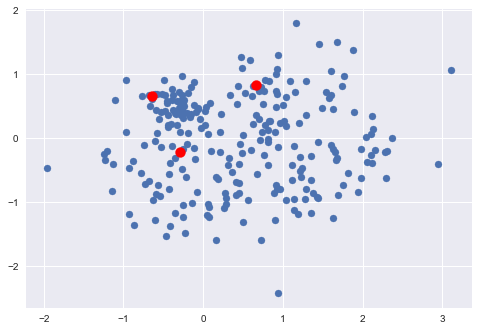

In [27]:
plt.scatter(points[:, 0], points[:, 1])
centroids = initialize_centroids(points, 3)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

Returns the closest centroid for each point. 

Uses numpy broadcasting. 

In [28]:
def closest_centroid(points, centroids):
    """returns an array containing the index to the nearest centroid for each point"""
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

In [29]:
c = initialize_centroids(points, 3)
closest_centroid(points, c)

array([0, 1, 2, 1, 1, 1, 1, 0, 1, 2, 0, 1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0, 1, 1,
       1, 2, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 2, 1, 2, 1, 1, 1, 1, 0, 1, 0,
       0, 2, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0,
       1, 2, 1, 0, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2,
       1, 2, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2])

Note on numpy broadcasting. The variable `c` denotes the centroids.

In [30]:
c

array([[ 1.22861736, -0.60675725],
       [ 1.21531929, -0.30327523],
       [-0.59741351,  0.43740495]])

Numpy allows you to extend an array by a new dimension using the `np.newaxis` command:

In [31]:
c_extended = c[: , np.newaxis, :]
c_extended

array([[[ 1.22861736, -0.60675725]],

       [[ 1.21531929, -0.30327523]],

       [[-0.59741351,  0.43740495]]])

Our array, which had a shape of 3x2 becomes an array of the following shape:

In [32]:
c_extended.shape

(3, 1, 2)

We've just added a dimension in the middle of the array. This allows us to substract this array from an existing point `p`, due to the fact that numpy applies broadcasting rules to array of non-matching sizes which allow for efficient operations (this is described in detail in the broadcasting section of the following document: [http://nbviewer.ipython.org/url/www.astro.washington.edu/users/vanderplas/Astr599_2014/notebooks/11_EfficientNumpy.ipynb](http://nbviewer.ipython.org/url/www.astro.washington.edu/users/vanderplas/Astr599_2014/notebooks/11_EfficientNumpy.ipynb)).

In particular, the rule used here for non-matching dimensions is:

> If the two arrays differ in their number of dimensions, the shape of the array with fewer dimensions is padded with ones on its leading (left) side.

In [33]:
p = points[0]
p

array([ 0.07233804, -1.07836887])

In [34]:
c_extended - p

array([[[ 1.15627932,  0.47161161]],

       [[ 1.14298124,  0.77509364]],

       [[-0.66975155,  1.51577381]]])

In [35]:
(c_extended - p).shape

(3, 1, 2)

The broadcasting allows us to keep the first dimension as the point dimension, which allows us to generalize the trick for more than one point, as demonstrated by the next line:

In [36]:
points[:4] - c_extended

array([[[-1.15627932, -0.47161161],
        [ 0.89441726,  0.21657906],
        [-1.01546048,  0.70283409],
        [ 0.75321544,  0.43444002]],

       [[-1.14298124, -0.77509364],
        [ 0.90771533, -0.08690296],
        [-1.0021624 ,  0.39935207],
        [ 0.76651352,  0.130958  ]],

       [[ 0.66975155, -1.51577381],
        [ 2.72044813, -0.82758314],
        [ 0.81057039, -0.34132811],
        [ 2.57924631, -0.60972218]]])

This then allows us to apply square root, square and sum operations that efficiently reduce the number of dimensions of the matrix:

In [37]:
np.sqrt(((points[:4] - c_extended)**2).sum(axis=2))

array([[ 1.24875913,  0.92026557,  1.23496386,  0.8695238 ],
       [ 1.38100553,  0.91186581,  1.07880098,  0.77762007],
       [ 1.65714737,  2.84354213,  0.87950511,  2.65033444]])

Finally, we can obtain the index of the closest centroid using the `np.argmin` function:

In [38]:
np.argmin(np.sqrt(((points[:4] - c_extended)**2).sum(axis=2)), axis=0)

array([0, 1, 2, 1])

The last step in the algorithm is to move the centroids to the mean location associated with it:

In [39]:
def move_centroids(points, closest, centroids):
    """returns the new centroids assigned from the points closest to them"""
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

In [40]:
move_centroids(points, closest_centroid(points, c), c)

array([[ 0.82270228, -0.95375339],
       [ 1.21428512,  0.31735284],
       [-0.37798032,  0.16941589]])

We can visualize these first two steps in the following way:

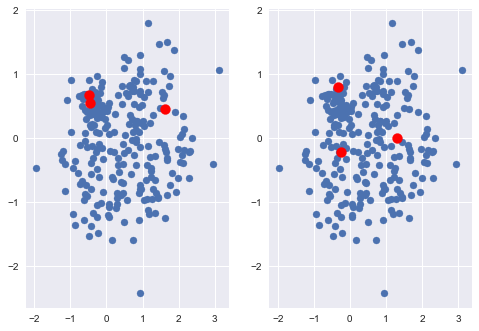

In [41]:
plt.subplot(121)
plt.scatter(points[:, 0], points[:, 1])
centroids = initialize_centroids(points, 3)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

plt.subplot(122)
plt.scatter(points[:, 0], points[:, 1])
closest = closest_centroid(points, centroids)
centroids = move_centroids(points, closest, centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

We can animate this type of plot using a module called JSAnimation:

RuntimeError: The init_func must return a sequence of Artist objects.

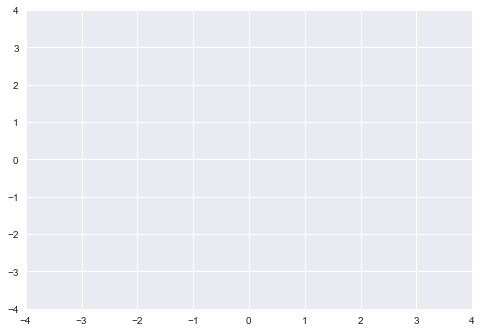

In [43]:
from JSAnimation import IPython_display
from matplotlib import animation

# create a simple animation
fig = plt.figure()
ax = plt.axes(xlim=(-4, 4), ylim=(-4, 4))
centroids = initialize_centroids(points, 3)

def init():
    return

def animate(i):
    global centroids
    closest = closest_centroid(points, centroids)
    centroids = move_centroids(points, closest, centroids)
    ax.cla()
    ax.scatter(points[:, 0], points[:, 1], c=closest)
    ax.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
    return 

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=10, interval=200, blit=True)

The previous animation shows how the points in the dataset are changing their assigned centroid and how the centroid itself moves.

We can also try running the same type of animation using more clusters than intended in the original data:

RuntimeError: The init_func must return a sequence of Artist objects.

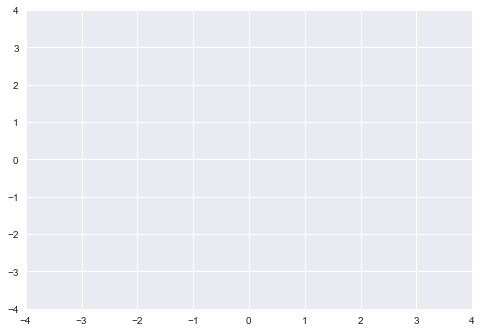

In [44]:
fig = plt.figure()
ax = plt.axes(xlim=(-4, 4), ylim=(-4, 4))
centroids = initialize_centroids(points, 7)

def init():
    return

def animate(i):
    global centroids
    closest = closest_centroid(points, centroids)
    centroids = move_centroids(points, closest, centroids)
    ax.cla()
    ax.scatter(points[:, 0], points[:, 1], c=closest)
    ax.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
    return 

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=30, interval=200, blit=True)

So that's it for today. I hope you have enjoyed this little notebook that demosntrated how to implement the k-means algorithm and animate it in the browser.

This post was entirely written using the IPython notebook. Its content is BSD-licensed. You can see a static view or download this notebook with the help of nbviewer at [20150717_Kmeans.ipynb](http://nbviewer.ipython.org/urls/raw.github.com/flothesof/posts/master/20150717_Kmeans.ipynb).